In [4]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

In [5]:
# preprocessing StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

Feature: 0, Score: 0.14212
Feature: 1, Score: 0.12060
Feature: 2, Score: 0.12698
Feature: 3, Score: 0.03525
Feature: 4, Score: 0.21223
Feature: 5, Score: 0.11205
Feature: 6, Score: 0.09920
Feature: 7, Score: 0.15158
time for running the algorithm = 0.026002126000093995 s


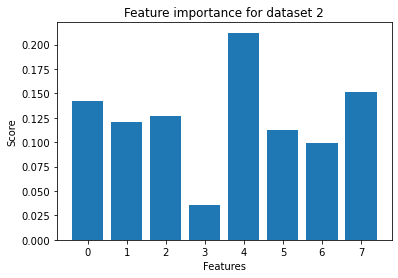

In [10]:
from matplotlib import pyplot

time1 = time.perf_counter()

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_scaled, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Features')
pyplot.ylabel('Score')
pyplot.title('Feature importance for dataset 2')
pyplot.show()

In [7]:
df_new = df.drop(columns=['Subject'])
df_new.head()

,Year,Length,Title,Actor,Actress,Director,Popularity,Awards
0,67,65,1161,30,0,8,68,0
1,68,67,550,69,0,8,68,0
2,60,58,317,620,1,151,79,0
3,56,76,299,127,1,367,6,0
4,55,48,313,241,1,393,14,0


In [11]:
# save the data
df_new.to_csv('Movie_DT.csv', index=False)